# **Problem Statement**
A series of experiments were carried out at SPCE by a PG student to study rate of crack growth in a standard
compact tension specimen of carbon steel, subjected to cyclic loading. Each experiment was conducted
with a different combination of specimen thickness, maximum amplitude of load and frequency of loading.
The objective of experiment was to study the influence of loading frequency and range of stress intensity
factor (ΔK is a parameter which represents crack tip stress field) on the crack growth rate.

**Task: -** Given two input values (Frequency and Delta K), predict the crack growth rate (da/dN).

Additional info about the input features: -


*   ‘da/dN’ : crack growth rate in m/cycle
*   ‘Delta K’ : range of stress intensity factor in MPa√m
*   ‘Frequency’ : Frequency of loading in Hz (1 Hz, 25 Hz and 50 Hz)

# **Solution**

### Approach: -



1.   Extract the relevant features from the dataset.
2.   Dataset visualization
3.   Compute correlation coefficients between features and label.
4.   Split dataset into train, validation and test set.
5.   Feature scaling.
6.   Build ML model.
7.   Tune the model.
8.   Evaluate model performance on test set.
9.   Visualization of trained model on the test set.



In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading the csv file.
df = pd.read_csv("crack-growth.csv", header=0)

In [3]:
df

,Cycle,Crack Size,da/dN,a/W,Date,Time,Pmax,Pmin,Delta P,R ratio,...,Frequency,Baseline Pmin,Baseline Delta K,Remarks,1% Sop/Smax,2% Sop/Smax,4% Sop/Smax,1% Delta Keff,2% Delta Keff,4% Delta Keff
0,96460,10.011,1.000000e-07,0.394,27-Dec-19,14:42:02,1.746,0.002,1.744,0.001,...,50,0,12.664,NaN,0.304,0.474,0.0,8.814,6.660,12.664
1,96512,10.013,1.000000e-07,0.394,27-Dec-19,14:42:03,1.747,0.000,1.747,0.000,...,50,0,12.667,NaN,0.297,0.306,0.0,8.900,8.792,12.667
2,96616,10.016,2.000000e-07,0.394,27-Dec-19,14:42:05,1.747,0.004,1.743,0.002,...,50,0,12.676,NaN,0.466,0.490,0.0,6.768,6.460,12.676
3,96720,10.016,2.000000e-07,0.393,27-Dec-19,14:42:07,1.751,-0.001,1.752,-0.001,...,50,0,12.666,NaN,0.395,0.431,0.0,7.663,7.209,12.666
4,96824,10.016,2.000000e-07,0.394,27-Dec-19,14:42:09,1.748,0.004,1.744,0.002,...,50,0,12.664,NaN,0.472,0.000,0.0,6.693,12.664,12.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10401,180739,18.007,1.099500e-03,0.709,16-Jan-20,13:06:21,2.205,0.042,2.163,0.019,...,25,0,50.480,NaN,0.139,0.000,0.0,43.476,50.480,50.480
10402,180752,18.024,1.031300e-03,0.710,16-Jan-20,13:06:21,2.201,0.041,2.160,0.019,...,25,0,50.574,NaN,0.183,0.121,0.0,41.335,44.436,50.574
10403,180752,18.024,1.038000e-03,0.710,16-Jan-20,13:06:21,2.201,0.041,2.160,0.019,...,25,0,50.574,NaN,0.183,0.121,0.0,41.335,44.436,50.574
10404,180765,18.037,1.028100e-03,0.710,16-Jan-20,13:06:22,2.198,0.048,2.150,0.022,...,25,0,50.655,NaN,0.211,0.150,0.0,39.947,43.074,50.655


## Extracting features

In [4]:
print(df.columns)

Index(['Cycle', 'Crack Size', 'da/dN', 'a/W', 'Date', 'Time', 'Pmax', 'Pmin',
       'Delta P', 'R ratio', 'Kmax', 'Kmin', 'Delta K', 'Compliance',
       'COD max', 'COD min', 'SP-Pmax', 'SP-Pmin', 'Step', 'Frequency',
       'Baseline Pmin', 'Baseline Delta K', ' Remarks', '1% Sop/Smax',
       '2% Sop/Smax', '4% Sop/Smax', '1% Delta Keff', '2% Delta Keff',
       '4% Delta Keff'],
      dtype='object')


In [5]:
# Output label
y = df.loc[:,"da/dN"]
y.describe()

count    10406.000000
mean         0.000555
std          0.000903
min          0.000000
25%          0.000016
50%          0.000136
75%          0.000714
max          0.008148
Name: da/dN, dtype: float64

In [6]:
# Input features - Delta K and Frequency
X = df.loc[:,["Delta K", "Frequency"]]
X.describe()

,Delta K,Frequency
count,10406.000000,10406.000000
mean,31.296116,22.729387
std,15.164980,21.326329
min,12.627000,1.000000
25%,16.955500,1.000000
50%,27.018500,25.000000
75%,43.760000,50.000000
max,68.734000,50.000000


In [7]:
X.head()

,Delta K,Frequency
0,12.652,50
1,12.664,50
2,12.646,50
3,12.666,50
4,12.634,50


## Data Visualization

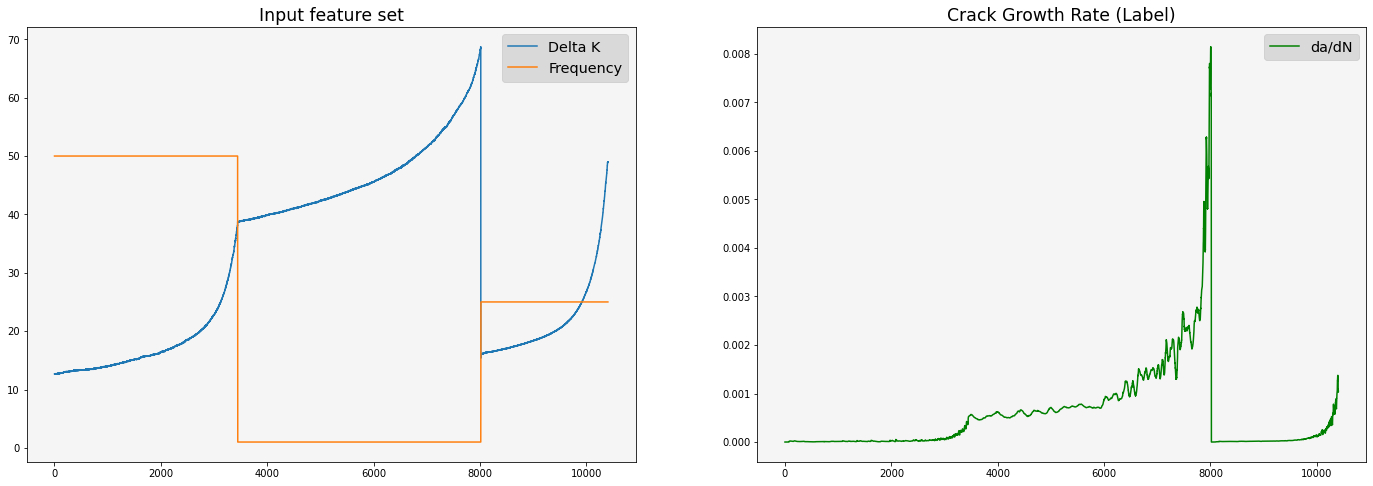

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(24)
axes[0].plot(X.iloc[:,0], label="Delta K")
axes[0].plot(X.iloc[:,1], label="Frequency")
axes[0].set_title("Input feature set", fontdict={"fontsize":"xx-large"})
axes[0].set_facecolor("#F5F5F5")
axes[0].legend(fontsize="x-large", facecolor="#D3D3D3", handleheight=1.0)

axes[1].plot(y, label="da/dN", c="g")
axes[1].set_title("Crack Growth Rate (Label)", fontdict={"fontsize":"xx-large"})
axes[1].set_facecolor("#F5F5F5")
axes[1].legend(fontsize="x-large", facecolor="#D3D3D3")

## Correlation between the feature and label

Using Spearman correlation coefficient to see how the features relate to the label. Spearman's rank correlation coefficient assesses the relationship between two variables using a monotonic function (whether linear or not).

[Wikipedia article on Spearman Rank Correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

In [9]:
corr = df.loc[:,["Delta K", "Frequency", "da/dN"]].corr(method="spearman")
corr.style.background_gradient(cmap="coolwarm")

,Delta K,Frequency,da/dN
Delta K,1.000000,-0.859146,0.972355
Frequency,-0.859146,1.000000,-0.811068
da/dN,0.972355,-0.811068,1.000000


It can be observed that the feature **"Delta K" is strongly related to the output label** (has a rank of +0.972). Here the positive sign indicates that "da/dN" increases as "Delta K" increases.
However, in case of **"Frequency" the reverse happens** (-0.811), i.e., "da/dN" decreases on increasing the value of "Frequency".

##  Building Machine Learning

Looking at the curve of crack growth rate, it can be seen that a polynomial model can be a better fit.

### Splitting dataset

Here, I am using the train-validation-test approach. The training set is set to 60% of the entire dataset, while validation and test set are each set to 20%.

In [10]:
from sklearn.model_selection import train_test_split

# Separating remaining data (validation+test) from training data.
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size= 0.60, random_state=6)

# Splitting the remaining data into validation and test set.
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.50, random_state=6)

In [11]:
X_train.describe()

,Delta K,Frequency
count,6243.000000,6243.000000
mean,31.168263,22.949223
std,15.099273,21.275195
min,12.627000,1.000000
25%,16.973000,1.000000
50%,26.668000,25.000000
75%,43.608500,50.000000
max,68.447000,50.000000


In [12]:
y_train.describe()

count    6243.000000
mean        0.000552
std         0.000923
min         0.000000
25%         0.000016
50%         0.000128
75%         0.000711
max         0.008148
Name: da/dN, dtype: float64

### Feature Scaling

Feature scaling becomes helpful in obtaining the convergence **faster** in case of Gradient Descent faster. In this project, I have used the StandardScaler method from sklearn library.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)  # returns np array

In [14]:
# Converting the numpy array obtained above to dataframe.
scaled_X_train_df = pd.DataFrame(scaled_X_train)

A linear fit to the dataset results in poor model performance. Hence, a combination of Polynomial regression and Ridge regression is used.

### Polynomial Regression with Ridge Regression

A linear fit to the dataset will result in poor model performance. Hence, a combination of Polynomial regression and Ridge regression is used.

For getting r2_score value as high as possible, model tuning was performed for various combinations of degree of polynomial and the regularization parameter. The results are shown below as an image. The excel file for the same has also been attached in the google classroom.
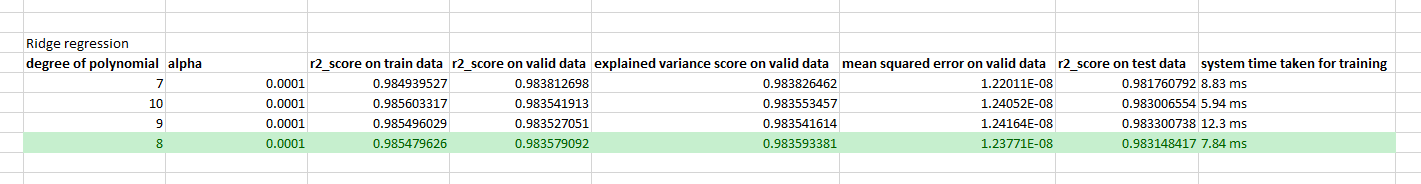

After analysing from the results of model tuning, the **degree of the polynomial is selected as 8 and regularization parameter (lambda) equal to 0.0001.**

Reason:-
1.   Increasing the degree of the polynomial will increase the computation time, and may also not generalize well (high variance) on the test set.
2.   Decreasing the degree of the polynomial may lead to high bias, thereby resulting in low value of r2_score.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [16]:
pr_model = Pipeline([("poly", PolynomialFeatures(degree=8)), ("ridge", linear_model.Ridge(alpha=0.0001))])

In [17]:
%%time
pr_model = pr_model.fit(scaled_X_train_df, y_train)

CPU times: user 15.4 ms, sys: 17.8 ms, total: 33.2 ms
Wall time: 30.8 ms


### Model performance

In [18]:
import sklearn.metrics as metrics

**Training Data**

In [19]:
# R2_score for training set
print("R2_score for training set:", pr_model.score(scaled_X_train_df,y_train))

R2_score for training set: 0.9854796256396883


**Cross Validation Data**

In [20]:
# R2_score for cross validation set
print("R2_score for cross-validation set:", pr_model.score(pd.DataFrame(scaler.transform(X_valid)), y_valid))

R2_score for cross-validation set: 0.9835790923502469


In [21]:
# Generate predictions for the validation set.
predictions_val = pr_model.predict(pd.DataFrame(scaler.transform(X_valid)))

In [22]:
# Explained Variance Score - similar to R2 score for validation set.
print(metrics.explained_variance_score(y_valid, predictions_val))

0.9835933806626226


In [23]:
# Mean Squared error for the validation set.
print(metrics.mean_squared_error(y_valid, predictions_val))

1.2377140865844716e-08


**Test Data**

In [24]:
# R2_score for test set
print("R2_score for test set:", pr_model.score(pd.DataFrame(scaler.transform(X_test)), y_test))

R2_score for test set: 0.9831484171822994


In [25]:
# Generate predictions for the test set.
test_preds = pr_model.predict(pd.DataFrame(scaler.transform(X_test)))

In [26]:
# Explained Variance Score - similar to R2 score for test set.
print(metrics.explained_variance_score(y_test, test_preds))

0.9831506229605055


In [27]:
# Mean Squared error for the test set.
print(metrics.mean_squared_error(y_test, test_preds))

1.2943254003650997e-08


### Trained model visualization on test set

In [28]:
print(test_preds.shape)

(2082,)


In [29]:
# Generating a numpy array for X axis. The X axis is not related to any of the
# parameters from the dataset.
tmp_X = np.arange(0,2082,1)

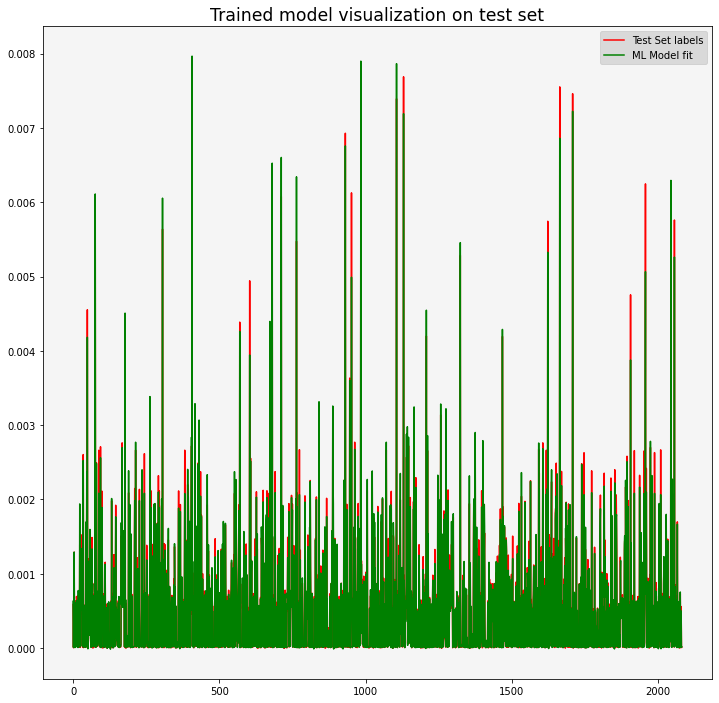

In [30]:
fig, axes = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
axes.plot(tmp_X, y_test, "r-", label="Test Set labels")
axes.plot(tmp_X, test_preds, "g-", label="ML Model fit")
axes.set_title("Trained model visualization on test set", fontdict={"fontsize":"xx-large"})
axes.set_facecolor("#F5F5F5")
axes.legend(facecolor="#D3D3D3")
plt.show()